# 워드클라우드

In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
  text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [8]:
# 영문자, 숫자제거
import re
new_tokens = []
for token in tokens:
  gift = re.sub('[A-Za-z0-9]', '', token)   # '[A-Za-z0-9]' =  \w
  if gift:
    new_tokens.append(gift)



In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

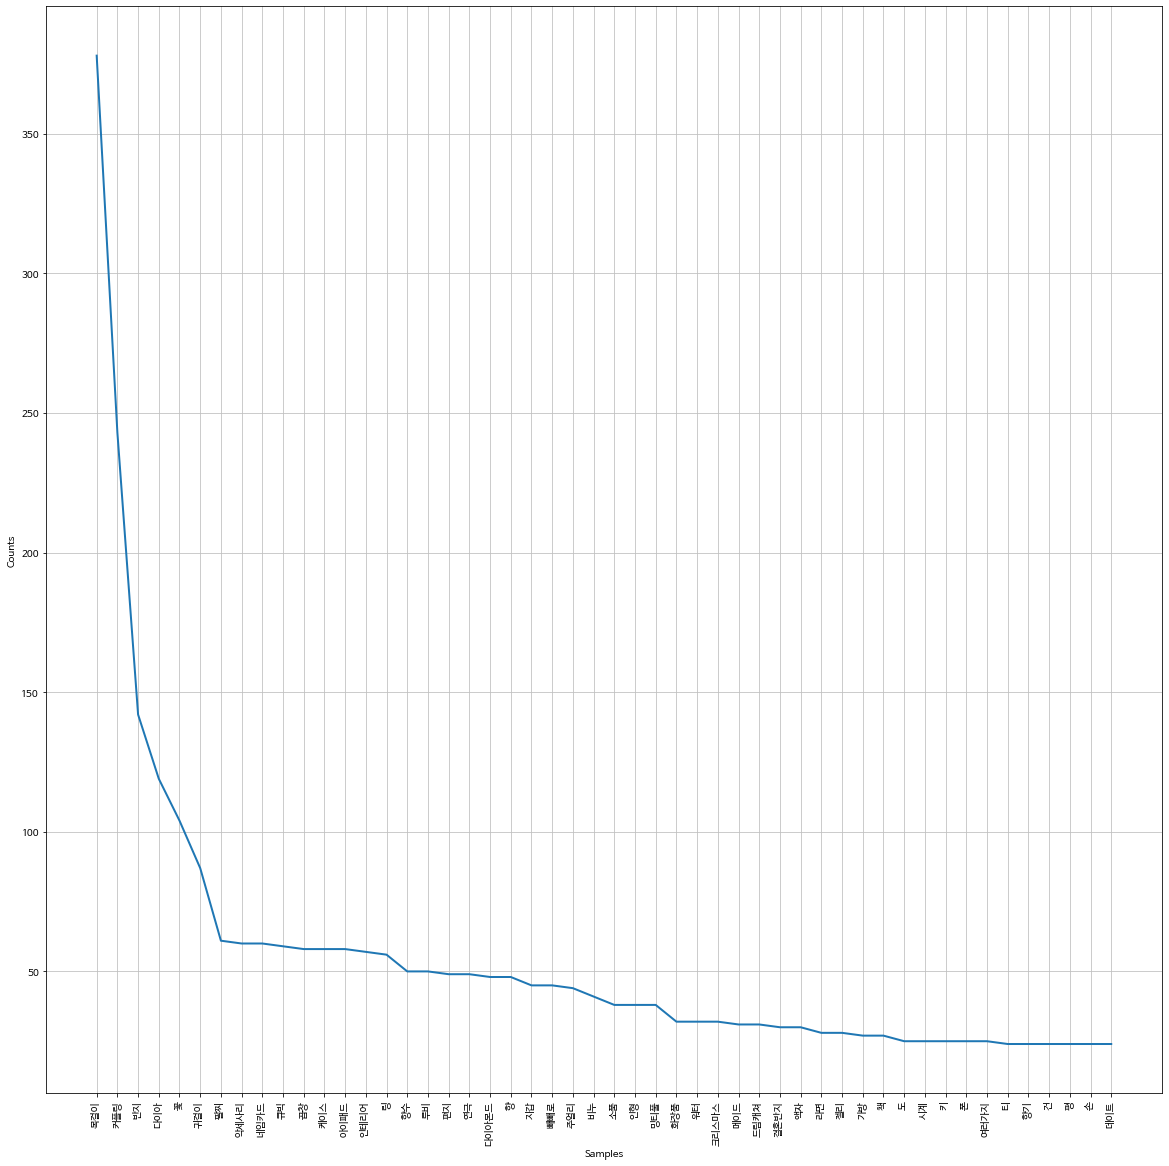

In [63]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(20,20))
gift.plot(50)
plt.show()

In [62]:
stoptext = """
  선물 추천 것 가격 수 가능 제품 여자친구 제 생각 요 사랑 사진 중 준 끗 모양 마감 등 요즘 오늘 가지 여자 머리 인기 티니 마음 로티 전 핸드 도움 색상 이래 아래 처 하두 실버 처리 자리 남 안쪽 모델 꽃말 보시 하두 무료 맞춤 이름 보기 무난 관심 말씀 워낙 백화점 뺏다꼇다 좀 추억 검색 보고 가성 주인공 사이 마크 여기 및 신호 효과 디자이너 크로스 연인 인단 보통 전문 다른 이번
  더 사용 구매 판매 때 창고 하나 해 한번 제작 용 준 거 네이버 사람 하트 커플 남녀 상품 직접 브랜드 선택 이벤트 근냥 끈 곳 세대 독서 심플 은 여성 가장 때문 정보 스타일 꼭 등등 쇼핑몽 답변 체크 냠 냘 날 밴드 벤드 나 미니 여 사이트 아이템 왕 다음 진심 페이 평이 데 글 속 알 구성 이 저희 몇개 구성 속 평이 더욱 그 리 주문 인치 일단 아이큐 쇼핑몰 드라마 기념 걸 세트 에어
  배송 층 정말 후기 타니 개 길동 요 더 저 제 기능 구매 고급 감동 한번 디자인 참고 여친 부담 남자 협찬 그냥 조금 정도 포장 변경 의미 켠 위 하투 주소 쇼핑 링크 이니셜 기념일 헤어 질문 친구 스토어 아주 할인 미쁜 스 이면 냠 지금 고민 센스 미만 유광 무광 뭐 말 스마트 자 및 준비 비 줄 활용 로 경우 우정 크로스 사이 기억 알 자 보고 이 가성 생일 착용 또한 각인 프로 느낌 하루
"""
stop_words = stoptext.split()
new_tokens = [ word for word in new_tokens if word not in stop_words ]

워드 클라우드 그리기

In [64]:
from wordcloud import WordCloud
from PIL import Image

In [65]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

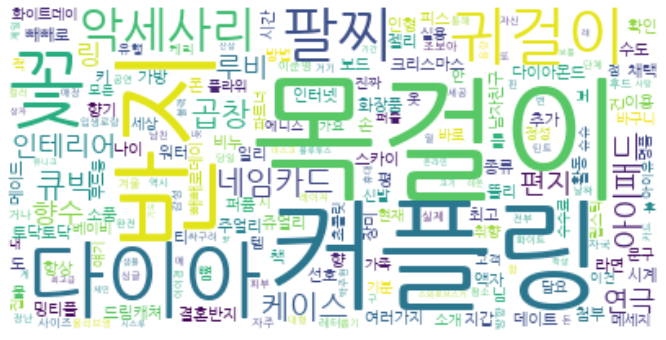

In [66]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 하트 그림에 표시

In [74]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [73]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

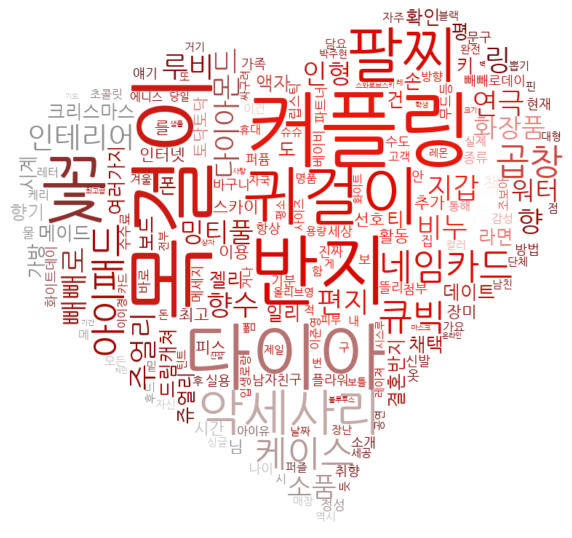

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()